# PHYS 410. Assignment 1.
## Anuar Yeraliyev, 47382130

We are given a function $$f(x) = \frac{e^{3x}sin(20x^2)}{1+2x^2} $$

We are trying to investigate the interpolating properties of several methods on the interval $[1, 2]$.
In real function fitting situations we are not given the function, we are trying to estimate it, so here we can compare between the true function and our interpolation techniques.
From the plot of the function (and the equation itself), we can deduce that it's a periodic sinusoidal continuous function. It's frequency and amplitude is increasing with $x$.

$N=10$ and $N=20$ points definitely seem not enough to model the periodic relationship, especially for large $x$.

In [1]:
%matplotlib inline

/Users/Anuar_The_Great/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

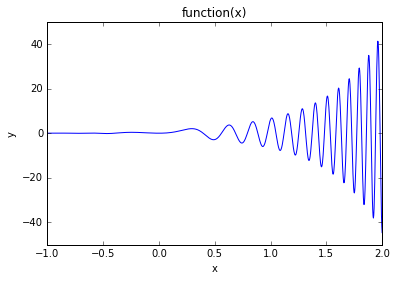

In [3]:
def func(x):
    return np.exp(3*x) * np.sin(20*x**2) / (1 + 2*x**2)

x = np.linspace(-1, 2, 1000)
plt.plot(x, func(x))
plt.title("function(x)")
plt.xlabel("x")
plt.ylabel("y")

/Users/Anuar_The_Great/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


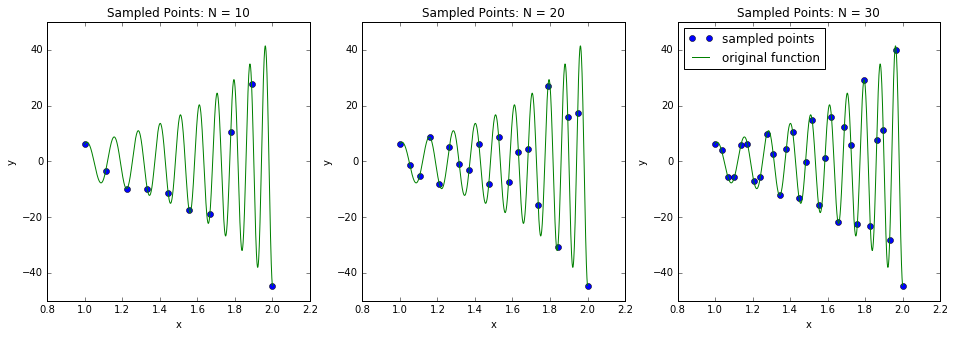

In [4]:
Ns = [10, 20, 30]
x = np.linspace(1, 2, 1000)
fig, axs = plt.subplots(1,3, figsize=(16, 5))
for i, N in enumerate(Ns):
    n = np.linspace(1, 2, N)
    axs[i].plot(n, func(n), 'o', label='sampled points')
    axs[i].plot(x, func(x), label='original function')
    plt.legend(loc='upper left')
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_xlim((0.8, 2.2))
    axs[i].set_title("Sampled Points: N = " + str(N))

## Cubic Spline
We sample the function at equally spaced points having N = 10; 20; 30. 
As $N$ increases the quality of interpolation increases. When $N=30$ the cubic spline is very close to the actual function.

The function successfully fit the sampled points precisely, but failed to obtain an accurate represention of the true function with small N.

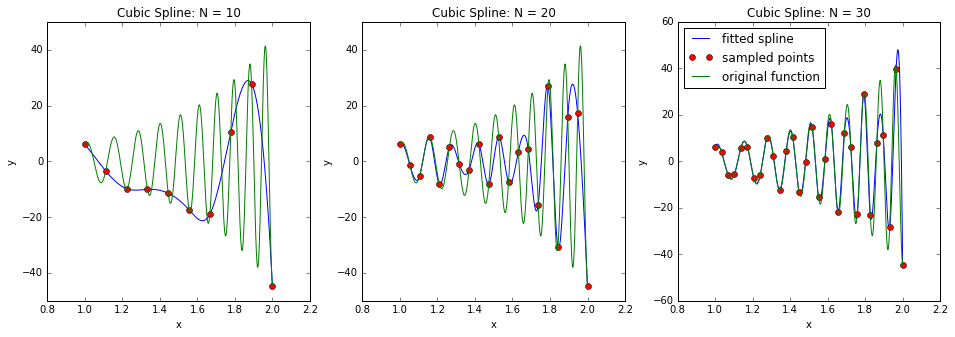

In [5]:
from scipy.interpolate import CubicSpline

Ns = [10, 20, 30]
x = np.linspace(1, 2, 1000)
fig, axs = plt.subplots(1,3, figsize=(16, 5))
for i, N in enumerate(Ns):
    n = np.linspace(1, 2, N)
    spline = CubicSpline(n, func(n))
    axs[i].plot(x, spline(x), label='fitted spline')
    axs[i].plot(n, func(n), 'ro', label='sampled points')
    axs[i].plot(x, func(x), label='original function')
    plt.legend(loc='upper left')
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_xlim((0.8, 2.2))
    axs[i].set_title("Cubic Spline: N = " + str(N))

## Barycentric Lagrange Interpolation
For cases of N=20 and N=30, the fitted functions are extremely unstable on the edges since there are no information about the function coming from either of the side. However, that is not the case for N=10 where the fit is still within the range of the true function.

Even though the function passes through every sampled point, the fits are not accurate.

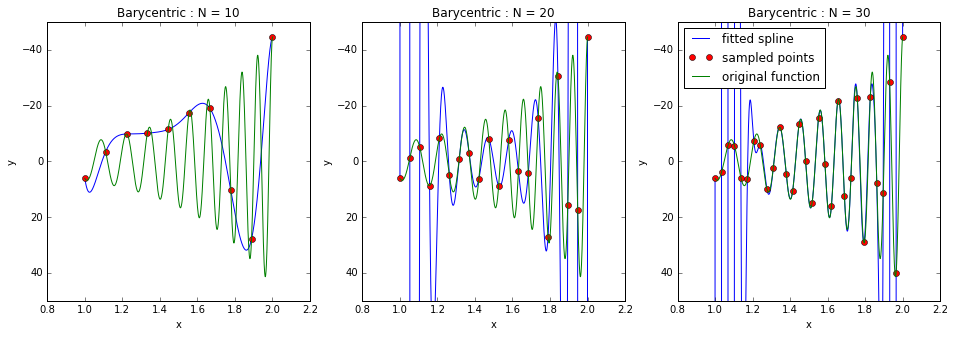

In [6]:
from scipy.interpolate import BarycentricInterpolator

Ns = [10, 20, 30]
x = np.linspace(1, 2, 1000)
fig, axs = plt.subplots(1,3, figsize=(16, 5))
for i, N in enumerate(Ns):
    n = np.linspace(1, 2, N)
    bary = BarycentricInterpolator(n, func(n))
    axs[i].plot(x, bary(x), label='fitted spline')
    axs[i].plot(n, func(n), 'ro', label='sampled points')
    axs[i].plot(x, func(x), label='original function')
    plt.legend(loc='upper left')
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_ylim((50, -50))
    axs[i].set_xlim((0.8, 2.2))
    axs[i].set_title("Barycentric : N = " + str(N))

## Barycentric with Chebyshev nodes
Chebyshev points were found using the following general formula:
$$ 0.5(a + b) + 0.5 (b - a) cos(\frac{\pi(2i - 1)}{2N}) $$

Chebyshev formula places a larger emphasis on the points near the edges, so that the model can optimally approximate the true function.
As a result, we absolutely removed the instability around the edges. Nevertheless, the fit of the graph is not near perfect in comparison to the cubic spline fit, the fit lacks some points in the middle and therefore failed to approximate the function precisely. One would need more points sampled in order to fit it accurately.

(array([ 6.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  6.]),
 array([ 1.00068523,  1.10054819,  1.20041114,  1.30027409,  1.40013705,
         1.5       ,  1.59986295,  1.69972591,  1.79958886,  1.89945181,
         1.99931477]),
 <a list of 10 Patch objects>)

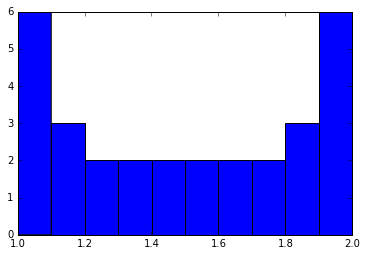

In [7]:
N = 30
j = np.arange(1, N+1)
n = 1.5 + 0.5 * np.cos(np.pi*(2*j - 1) / (2*N))
plt.hist(n)

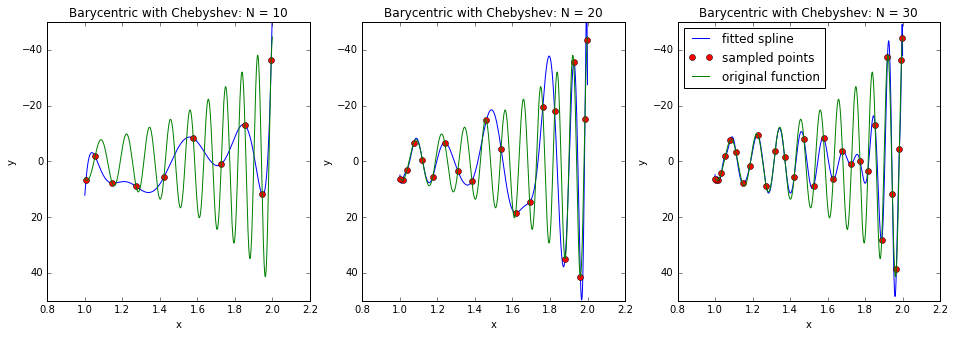

In [8]:
Ns = [10, 20, 30]
x = np.linspace(1, 2, 1000)
fig, axs = plt.subplots(1,3, figsize=(16, 5))
for i, N in enumerate(Ns):
    j = np.arange(1, N+1)
    n = 1.5 + 0.5 * np.cos(np.pi*(2*j - 1) / (2*N))
    bary = BarycentricInterpolator(n, func(n))
    axs[i].plot(x, bary(x), label='fitted spline')
    axs[i].plot(n, func(n), 'ro', label='sampled points')
    axs[i].plot(x, func(x), label='original function')
    plt.legend(loc='upper left')
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_ylim((50, -50))
    axs[i].set_xlim((0.8, 2.2))
    axs[i].set_title("Barycentric with Chebyshev: N = " + str(N))

## Additional Testing:
I tested for the interval of $[3, 4]$ and added additional graph with $N=100$.

The frequency of the function is much larger, so one would require much more points to be sampled in order to catch the more complex structure. Nevertheless, $N=100$ produced accurate fits in the case of Cubic Spline and Barycentric Interpolation with Chebyshev Points.

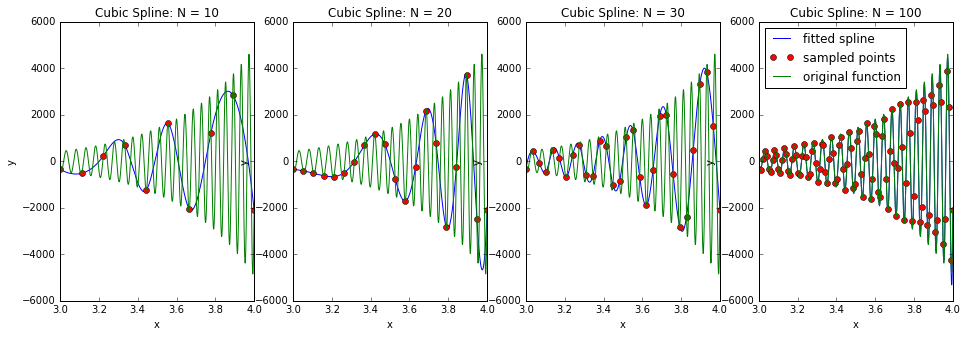

In [9]:
from scipy.interpolate import CubicSpline

Ns = [10, 20, 30, 100]
x = np.linspace(3, 4, 1000)
fig, axs = plt.subplots(1,4, figsize=(16, 5))
for i, N in enumerate(Ns):
    n = np.linspace(3, 4, N)
    spline = CubicSpline(n, func(n))
    axs[i].plot(x, spline(x), label='fitted spline')
    axs[i].plot(n, func(n), 'ro', label='sampled points')
    axs[i].plot(x, func(x), label='original function')
    plt.legend(loc='upper left')
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_xlim((3, 4))
    axs[i].set_title("Cubic Spline: N = " + str(N))

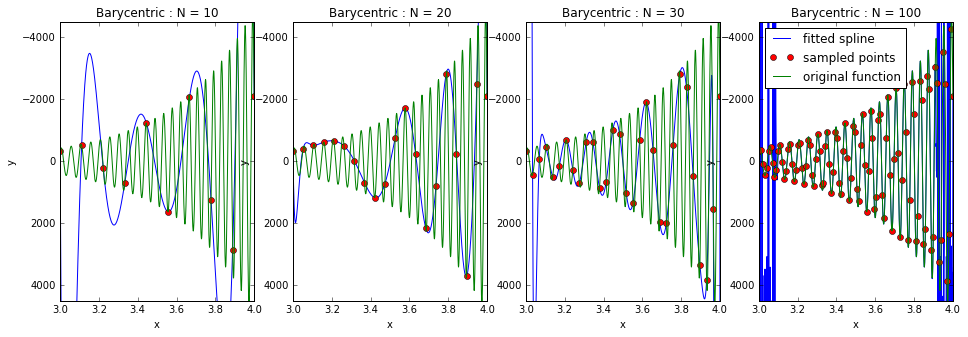

In [10]:
Ns = [10, 20, 30, 100]
x = np.linspace(3, 4, 1000)
fig, axs = plt.subplots(1, 4, figsize=(16, 5))
for i, N in enumerate(Ns):
    n = np.linspace(3, 4, N)
    bary = BarycentricInterpolator(n, func(n))
    axs[i].plot(x, bary(x), label='fitted spline')
    axs[i].plot(n, func(n), 'ro', label='sampled points')
    axs[i].plot(x, func(x), label='original function')
    plt.legend(loc='upper left')
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_ylim((4500, -4500))
    axs[i].set_xlim((3, 4))
    axs[i].set_title("Barycentric : N = " + str(N))

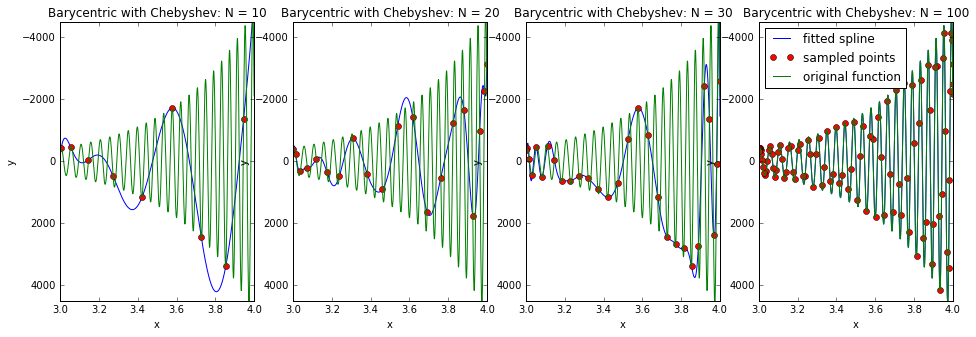

In [11]:
Ns = [10, 20, 30, 100]
x = np.linspace(3, 4, 1000)
fig, axs = plt.subplots(1, 4, figsize=(16, 5))
for i, N in enumerate(Ns):
    j = np.arange(1, N+1)
    n = 3.5 + 0.5 * np.cos(np.pi*(2*j - 1) / (2*N))
    bary = BarycentricInterpolator(n, func(n))
    axs[i].plot(x, bary(x), label='fitted spline')
    axs[i].plot(n, func(n), 'ro', label='sampled points')
    axs[i].plot(x, func(x), label='original function')
    plt.legend(loc='upper left')
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_ylim((4500, -4500))
    axs[i].set_xlim((3, 4))
    axs[i].set_title("Barycentric with Chebyshev: N = " + str(N))